ME 639 Mid Sem 
Dhvani Shah
19110046
30/09/2021 - 01/10/2021

Question: 1(a) 


In [1]:
#Dhvani Shah 19110046 
#Code credits: Videh Patel : videh.p@iitgn.ac.in: 19110192
#Code edited according to the requirements of the question

import numpy as np

In [18]:
# DH Parameter Matrix [nx4 Matrix]
# Number of links automatically calculated from the size of matrix
# theta (rotation about z), d (translation about z), a(translation about x), alpha(rotation about x)
# First columns of params are frame 0-->1 and last columns are frame (n-1)-->n :: n is the end effector frame

def DH2HnJ(Hmat, prismatic=[]):
    #Hmat is the DH parameter matrix
    #prismatic is an array of the joints that are prismatic: Joint corresponding to qi is ith joint
    #All revolute and prismatic axes are assumed to be aligned with the respective z axis

    def d_(k):
        #Returns position vector of ee wrt k-frame in o-frame basis
        return (T[k][:3,:3])@(np.linalg.inv(T[k])@T[n]@(np.matrix([[0],[0],[0],[1]])))[:3,0]
        
    n = len(Hmat)
    T = [np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])]  #Array of all absolute Homogeneous Transformations : Has T0_0 at the start (Identity matrix)
    J = []  #Manipulator Jacobian
    for params in Hmat:
        theta, d, a, alpha = np.array(params)[0]
        Ti = np.matrix([ [ np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)],\
                         [ np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],\
                         [ 0            , np.sin(alpha)               , np.cos(alpha)              , d              ],\
                         [ 0            , 0                           , 0                          ,1              ] ])
        

        T.append(T[-1]@Ti)

    for i in range(n):
        if (i+1) in prismatic:
            Jv = T[i][:3,:3]@np.matrix([0,0,1]).T
            Jw = np.matrix([0,0,0]).T
        else: #Revolute
            Jw = T[i][:3,:3]@np.matrix([0,0,1]).T
            Jv = np.matrix(np.cross(Jw.T,d_(i).T).T)
        
        Ji = np.concatenate((Jv, Jw))
        
        if len(J) == 0:
            J = Ji
        else:
            J = np.concatenate((J,Ji), axis = 1)

        H = T[n]

    return H

In [62]:
def Stanford_invkin(p, dimensions):
    #Takes Transformation Matrix T and Stanford Manipulator (with shperical wrist) Dimensions as input and
    #returns joint params for a Stanford Manipulator to achieve the given position (Transformation Matrix)

    l1, l2 = dimensions
    x,y,z = np.array(p)

    #First 3 params
    q1 = np.arctan2(y,x)
    q2 = np.arctan2(z-l1, np.sqrt(x**2 + y**2))
    d3 = np.sqrt(x**2 + y**2 + (z-l1)**2) - l2- l4
    if d3 < 0:
        print('Point out of workspace')
        return None
  
    return q1, q2, d3

if __name__ == '__main__':
    #Verifying with previous code
    dim = [0.25, 0.25]
    l1, l2 = dim

    #Coordinates, uncomment only one of below four
    #p = [0.25, 0.075, 0.1]
    p = [0.25, -0.075, 0.1]
    #p = [0.45, 0.075, 0.1]
    #p = [0.45, -0.075, 0.1]

    q1, q2, d3 = Stanford_invkin(p, dim)

    Dh = np.matrix([[q1, l1, 0, np.pi/2],[np.pi/2 + q2, 0, 0, np.pi/2 ],[0, l2 + d3 , 0, 0],[0,0,0,-np.pi/2],[0,0,0,np.pi/2],[0, 0, 0,0]])

    H = DH2HnJ(Dh,[2])

    print('Calculated joint variables::')
    print(q1, q2, d3)
    print('Homogenous Transformation used calculated with the parameters::')
    print(H)
    print("End effector position = ", H[0:3, -1])

Calculated joint variables::
-0.2914567944778671 -0.5216056136891403 0.051039864469807406
Homogenous Transformation used calculated with the parameters::
[[ 4.77258861e-01 -2.87347886e-01  8.30454799e-01  2.50000000e-01]
 [-1.43177658e-01 -9.57826285e-01 -2.49136440e-01 -7.50000000e-02]
 [ 8.67020264e-01  9.17427543e-17 -4.98272879e-01  1.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
End effector position =  [[ 0.25 ]
 [-0.075]
 [ 0.1  ]]


In [88]:
def SCARA_invkin(p, dimensions):
    #Takes Transformation Matrix T and SCARA Manipulator (with shperical wrist) Dimensions as input and
    #returns joint params for a Stanford Manipulator to achieve the given position (Transformation Matrix)

    #dimensions is an array of form [l1, l2, l4, l5, l6]---> Link lengths
    ##Refer to pdf to look which link length corresponds to which

    l1, l2 = dimensions

    #Position of wrist centre
    x,y,z = np.array(p)

    #Inverse Position of wrist centre
    #First 3 params
    q2 = np.arccos((x*x + y*y - l1**2 - l2**2)/(2*l1*l2))
    q1 = np.arctan2(y,x) - np.arctan(l2*np.sin(q2)/(l1 + l2*np.cos(q2)))
    d3 = -z + l1
    if d3 < 0:
        print('Point out of workspace')
        return None

    return q1, q2, d3


if __name__ == '__main__':
    #Verifying with previous code
    dim = [0.25, 0.25]
    T_ = np.matrix([[1,0,0,10],[0,-1,0,0],[0,0,-1,-6], [0,0,0,1]])
    l1, l2 = dim

    #Coordinates, uncomment only one of below four
    #p = [0.25, 0.075, 0.1]
    p = [0.25, -0.075, 0.1]
    #p = [0.45, 0.075, 0.1]
    #p = [0.45, -0.075, 0.1]

    q1, q2, d3  = SCARA_invkin(p , dim)

    Dh = np.matrix([[q1, l1, l1, 0],
                    [q2, 0, l2, np.pi],
                    [0, d3, 0, 0]])
    H = DH2HnJ(Dh,[2])

    print('Calculated joint variables::')
    print("Theta1 =  ", q1, ", Theta2 = " q2, ", d3 = ", d3)
    print('Homogenous Transformation used calculated with the parameters::')
    print(H)

Calculated joint variables::
-1.313041064939743 2.0431685409237517 0.15
Homogenous Transformation used calculated with the parameters::
[[ 7.45089386e-01  6.66964621e-01  8.16796089e-17  2.50000000e-01]
 [ 6.66964621e-01 -7.45089386e-01 -9.12471332e-17 -7.50000000e-02]
 [ 0.00000000e+00  1.22464680e-16 -1.00000000e+00  1.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


PUMA Manipulator Coordinate Assignment

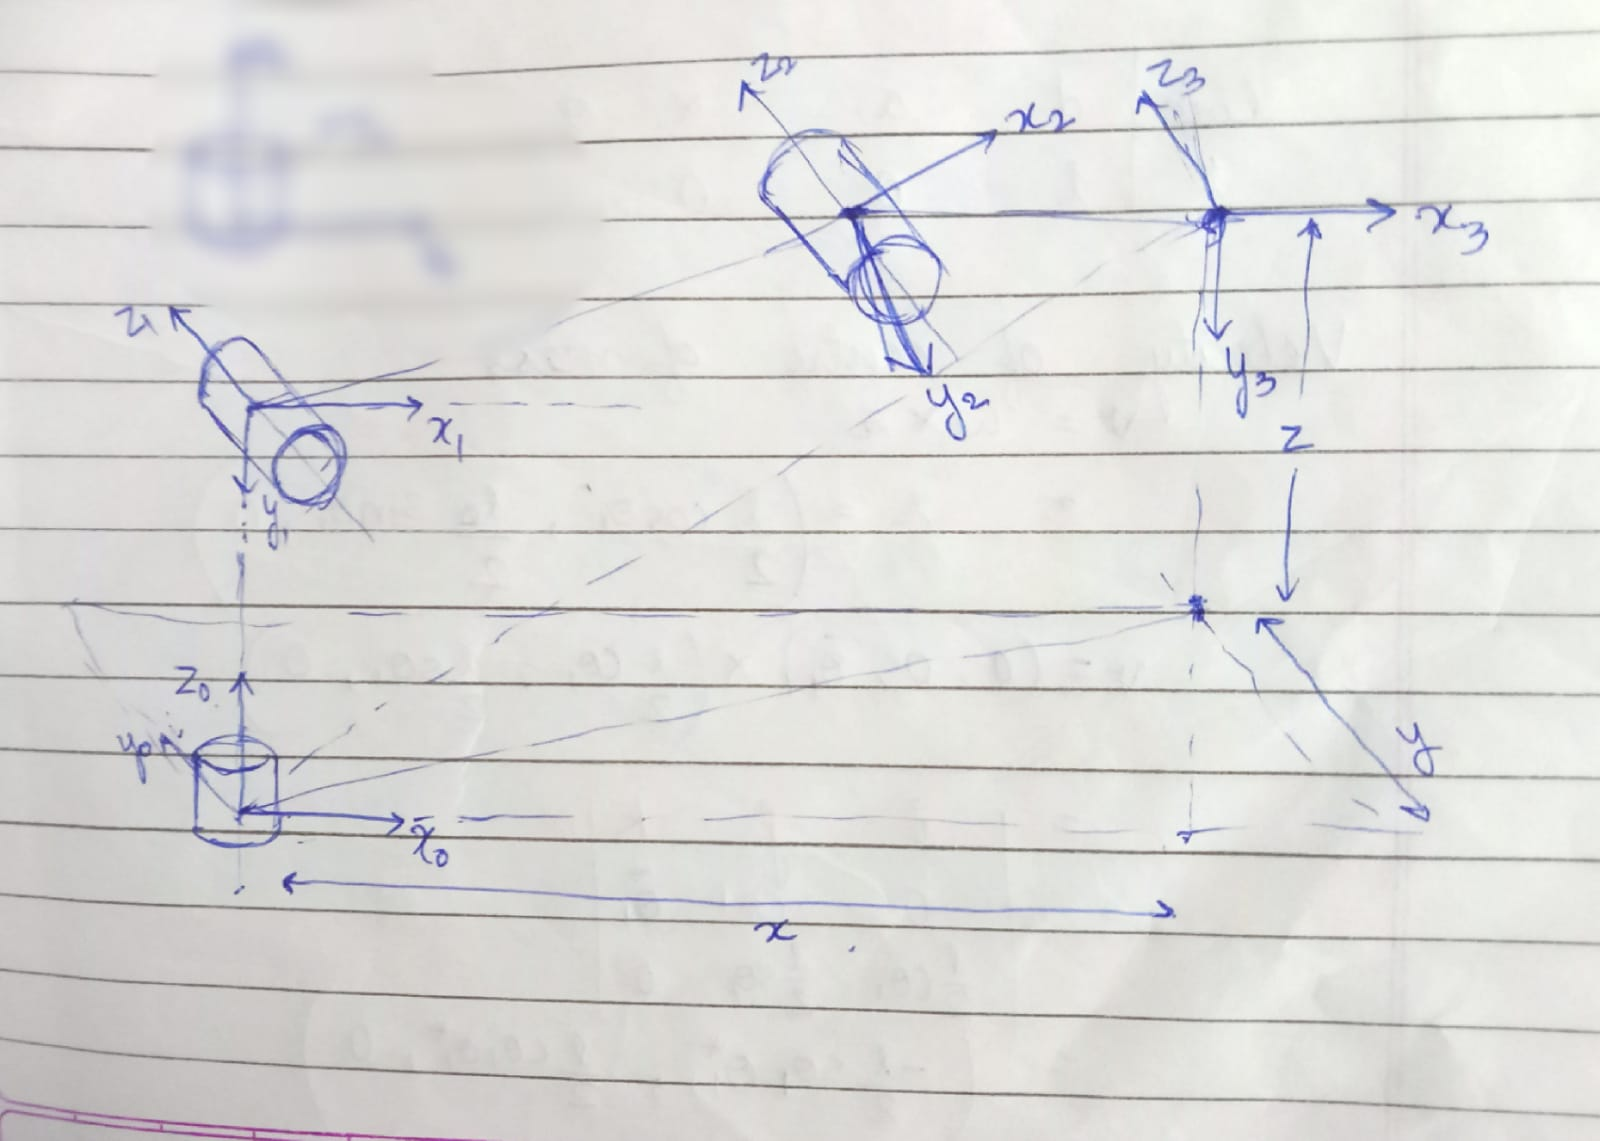

In [82]:
#Own code starts from here
def PUMA_invkin(p, dimensions):
  l1, l2, l3 = dimensions

  #position of end point
  x, y, z = np.array(p)

  #Inverse kinematics implementation
  theta1 = np.arctan(y/x)
  D = (x**2 + y**2 + (z - l1)**2  - l2**2 - l3**2)/(2*l2*l3)
  theta3 = np.arccos(D)
  theta2 = np.arctan((z - l1)/np.sqrt(x**2 + y**2)) - np.arctan(l3*np.sin(theta3)/(l2 + l3*np.cos(theta3)))

  return theta1, theta2, theta3


if __name__ == '__main__':
    #Verifying with previous code
    dim = [0.25, 0.25, 0.25]
    #T_ = np.matrix([[1,0,0,10],[0,-1,0,0],[0,0,-1,-6], [0,0,0,1]])
    l1, l2, l3 = dim

    #Coordinates, uncomment only one of below four
    #p = [0.25, 0.075, 0.1]
    p = [0.25, -0.075, 0.1]
    #p = [0.45, 0.075, 0.1]
    #p = [0.45, -0.075, 0.1]

    q1, q2, q3  = PUMA_invkin(p , dim)

    print('Calculated joint variables::')
    print("Theta1 = ", q1, "Theta2 = ", q2, "Theta3 = ", q3)
    
    #theta, d, a, alpha
    Dh = np.matrix([[q1, l1, 0, -np.pi/2],[q2 , 0, -l2, 0],[q3 , 0, -l3, 0]])
    H = DH2HnJ(Dh,[])

    print('Homogenous Transformation used calculated with the parameters::')
    print(H)

    print("End effector position = ", H[0:3, -1])

Calculated joint variables::
Theta1 =  -0.2914567944778671 Theta2 =  -1.4462986282824137 Theta3 =  1.8493860291865472
Homogenous Transformation used calculated with the parameters::
[[ 8.81060642e-01 -3.75717098e-01  2.87347886e-01 -2.50000000e-01]
 [-2.64318193e-01  1.12715129e-01  9.57826285e-01  7.50000000e-02]
 [-3.92260166e-01 -9.19854316e-01  6.12323400e-17  1.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
End effector position =  [[-0.25 ]
 [ 0.075]
 [ 0.1  ]]


Question: 1(b)


In [92]:
def verify_workspace(p, robot_type):
  #type = 1(Stanford)
  #type = 2(SCARA)
  #type = 3(PUMA)
  #pi's are the coordinate points taken as input for testing 

  if(robot_type == 1):
    dims = [0.25, 0.25]
    l1, l2 = dims

    q1, q2, d3 = Stanford_invkin(p, dims)
    print("Joint variables:")
    print("theta1 = ", q1, ", theta2 = ", q2, ", d3 = ", d3)

    Dh = np.matrix([[q1, l1, 0, np.pi/2],[np.pi/2 + q2, 0, 0, np.pi/2 ],[0, l2 + d3 , 0, 0],[0,0,0,-np.pi/2],[0,0,0,np.pi/2],[0, 0, 0,0]])

    H = DH2HnJ(Dh,[2])

  elif(robot_type == 2):
    dims = [0.25, 0.25]
    l1, l2 = dims

    q1, q2, d3 = SCARA_invkin(p, dims)
    print("Joint variables:")
    print("theta1 = ", q1, ", theta2 = ", q2, ", d3 = ", d3)

    Dh = np.matrix([[q1, l1, l1, 0],
                    [q2, 0, l2, np.pi],
                    [0, d3, 0, 0]])
    H = DH2HnJ(Dh,[2])
  
  elif(robot_type == 3):
    dims = [0.25, 0.25, 0.25]
    l1, l2, l3 = dims

    q1, q2, q3 = PUMA_invkin(p, dims)
    print("Joint variables:")
    print("theta1 = ", q1, ", theta2 = ", q2, ", theta3 = ", q3)

    Dh = np.matrix([[q1, l1, 0, -np.pi/2],[q2 , 0, -l2, 0],[q3 , 0, -l3, 0]])
    H = DH2HnJ(Dh,[])


  print("End effector coordinates from forward kinematics: ")
  print(H[0:3, -1])


if __name__ == '__main__':
  robot_type = int(input("Enter 1 = Stanford, 2 = SCARA, 3 = PUMA : "))
  coordinates = list(map(float, input("Enter coordinates seperated by space (x y z) : ").split()))
  verify_workspace(coordinates, robot_type)


Enter 1 = Stanford, 2 = SCARA, 3 = PUMA : 2
Enter coordinates seperated by space (x y z) : 0.25 0.075 0.1
Joint variables:
theta1 =  -0.7301274759840087 , theta2 =  2.0431685409237517 , d3 =  0.15
End effector coordinates from forward kinematics: 
[[0.25 ]
 [0.075]
 [0.1  ]]


Question: 1c


In [93]:
p1 = [0.40, 0.06, 0.1]
p2 = [0.40, 0.01, 0.1]
p3 = [0.35, 0.01, 0.1]
p4 = [0.35, 0.06, 0.1]

#Verifying of Stanford
robot_type = 1
verify_workspace(p1, robot_type)
verify_workspace(p2, robot_type)
verify_workspace(p3, robot_type)
verify_workspace(p4, robot_type)

#Verifying for SCARA
robot_type = 2
verify_workspace(p1, robot_type)
verify_workspace(p2, robot_type)
verify_workspace(p3, robot_type)
verify_workspace(p4, robot_type)

#Verifyiing for PUMA
robot_type = 3
verify_workspace(p1, robot_type)
verify_workspace(p2, robot_type)
verify_workspace(p3, robot_type)
verify_workspace(p4, robot_type)

Joint variables:
theta1 =  0.14888994760949723 , theta2 =  -0.3551283547555233 , d3 =  0.18139309220245986
End effector coordinates from forward kinematics: 
[[0.4 ]
 [0.06]
 [0.1 ]]
Joint variables:
theta1 =  0.02499479361892016 , theta2 =  -0.3586679747243447 , d3 =  0.17731721238442993
End effector coordinates from forward kinematics: 
[[0.4 ]
 [0.01]
 [0.1 ]]
Joint variables:
theta1 =  0.028563657838759998 , theta2 =  -0.4047440841038663 , d3 =  0.13091993909481814
End effector coordinates from forward kinematics: 
[[0.35]
 [0.01]
 [0.1 ]]
Joint variables:
theta1 =  0.16977827396833844 , theta2 =  -0.3996744581806758 , d3 =  0.13548670534792762
End effector coordinates from forward kinematics: 
[[0.35]
 [0.06]
 [0.1 ]]
Joint variables:
theta1 =  -0.4795426595751926 , theta2 =  1.2568652143693797 , d3 =  0.15
End effector coordinates from forward kinematics: 
[[0.4 ]
 [0.06]
 [0.1 ]]
Joint variables:
theta1 =  -0.6180895978105604 , theta2 =  1.2861687828589612 , d3 =  0.15
End effec

In [ ]:
#From the output, we can see that all the points lie in the workspace of all robots

Question: 1e

In [73]:
#@author: Videh Patel : videh.p@iitgn.ac.in: 19110192
#Stanford Inverse Kinematics
#Code modified according to requirements of question

def R2EA_A(R, positive_theta = True):
    #Takes a rotation matrix input and returns Euler's Angles (phi, theta, psi)
    #positive_theta directs the solution chosen for the final output
    #Takes phi = 0 whenever infinitely many solutions are possible
    if ((R[2,0] == 0) and (R[2,1] == 0)):
        phi = 0
        if R[2,2] == 1:
            theta = 0
            psi = np.arctan2(R[1,0],R[0,0])
        elif R[2,2] == -1:
            theta = np.pi if positive_theta else -np.pi
            psi = -np.arctan2(-R[1,0], -R[0,0])
        else:
            print('Invalid Rotation Matrix')
            return None
    else:
        if positive_theta:
            theta = np.arctan2(np.sqrt(1 - R[2,2]**2), R[2,2])
            phi = np.arctan2(R[1,2], R[0,2])
            psi = np.arctan2(R[2,1], -R[2,0])
        else: #Negative Theta
            theta = np.arctan2(-np.sqrt(1 - R[2,2]**2), R[2,2])
            phi = np.arctan2(-R[1,2], -R[0,2])
            psi = np.arctan2(-R[2,1], R[2,0])
    
    return phi, theta, psi
# DH Parameter Matrix [nx4 Matrix]
# Number of links automatically calculated from the size of matrix
# theta (rotation about z), d (translation about z), a(translation about x), alpha(rotation about x)
# First columns of params are frame 0-->1 and last columns are frame (n-1)-->n :: n is the end effector frame

def DH2HnJ_A(Hmat, prismatic=[]):
    #Hmat is the DH parameter matrix
    #prismatic is an array of the joints that are prismatic: Joint corresponding to qi is ith joint
    #All revolute and prismatic axes are assumed to be aligned with the respective z axis

    def d_(k):
        #Returns position vector of ee wrt k-frame in o-frame basis
        return (T[k][:3,:3])@(np.linalg.inv(T[k])@T[n]@(np.matrix([[0],[0],[0],[1]])))[:3,0]
        
    n = len(Hmat)
    T = [np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])]  #Array of all absolute Homogeneous Transformations : Has T0_0 at the start (Identity matrix)
    J = []  #Manipulator Jacobian
    for params in Hmat:
        theta, d, a, alpha = np.array(params)[0]
        Ti = np.matrix([ [ np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)],\
                         [ np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],\
                         [ 0            , np.sin(alpha)               , np.cos(alpha)              , d              ],\
                         [ 0            , 0                           , 0                          ,1              ] ])
        

        T.append(T[-1]@Ti)

    for i in range(n):
        if (i+1) in prismatic:
            Jv = T[i][:3,:3]@np.matrix([0,0,1]).T
            Jw = np.matrix([0,0,0]).T
        else: #Revolute
            Jw = T[i][:3,:3]@np.matrix([0,0,1]).T
            Jv = np.matrix(np.cross(Jw.T,d_(i).T).T)
        
        Ji = np.concatenate((Jv, Jw))
        
        if len(J) == 0:
            J = Ji
        else:
            J = np.concatenate((J,Ji), axis = 1)

        H = T[n]

    return H, J


def Stanford_invkin(p, dimensions):
    #Takes Transformation Matrix T and Stanford Manipulator (with shperical wrist) Dimensions as input and
    #returns joint params for a Stanford Manipulator to achieve the given position (Transformation Matrix)

    #dimensions is an array of form [l1, l2, l4, l5, l6]---> Link lengths
    ##Refer to pdf to look which link length corresponds to which
    R = np.matrix([[-1, 0, 0],
         [0, 1, 0],
         [0, 0, -1]])
    d = p

    l1, l2, l4, l5, l6 = dimensions

    #Position of wrist centre
    #p[2] = p[2]  + 0.05  
    x = p[0]
    y = p[1]
    z = p[2]

    #Inverse Position of wrist centre
    #First 3 params
    q1 = np.arctan2(y,x)
    q2 = np.arctan2(z-l1, np.sqrt(x**2 + y**2))
    d3 = np.sqrt(x**2 + y**2 + (z-l1)**2) - l2- l4
    if d3 < 0:
        print('Point out of workspace')
        return None

    #Finding euler angles of wrist
    Rz_q1 = np.matrix([[np.cos(q1), -np.sin(q1), 0], [np.sin(q1), np.cos(q1), 0],[0,0,1]])
    Rx_90 =  np.matrix([[1,0,0],[0,0,-1],[0,1,0]])
    Rz_q2 = np.matrix([[np.cos(q2 + np.pi/2), -np.sin(q2 + np.pi/2), 0], [np.sin(q2 + np.pi/2), np.cos(q2 + np.pi/2), 0], [0,0,1]])
    
    R3_0 = Rz_q1@Rx_90@Rz_q2@Rx_90
    
    R6_3 = np.linalg.inv(R3_0)@R
    q4, q5, q6 = R2EA_A(R6_3)

    return q1, q2, d3, q4, q5, q6

if __name__ == '__main__':
    #Verifying with previous code
    dim = [0.25, 0.25, 0, 0, 0.25]
    # T_ = np.matrix([[0,0,1,11],[0,-1,0,0],[1,0,0,5], [0,0,0,1]]) #Another test case
    #T_ = np.matrix([[1,0,0,11],[0,1,0,0],[0,0,1,5], [0,0,0,1]])
    l1, l2, l4, l5, l6 = dim
    
    #Coordinates, uncomment only one of below four
    #p = [0.25, 0.075, 0.1]
    p = [0.25, -0.075, 0.1]
    #p = [0.45, 0.075, 0.1]
    #p = [0.45, -0.075, 0.1]

    q1, q2, d3, q4, q5, q6 = Stanford_invkin(p, dim)

    Dh = np.matrix([[q1, l1, 0, np.pi/2],[np.pi/2 + q2, 0, 0, np.pi/2 ],[0, l2 + d3 + l4, 0, 0],[q4,0,0,-np.pi/2],[q5,0,0,np.pi/2],[q6, l5+l6, 0,0]])

    H,J = DH2HnJ_A(Dh,[2])

    #print('Homogenous Transformation used to calculate parameters::')
    #print(T_)
    print('Calculated joint variables::')
    print(q1, q2, d3, q4, q5, q6)
    print('Homogenous Transformation used calculated with the parameters::')
    print(H)
    print("End effector points : ")
    print(H[0:3, -1])
    print(" ")

#@author: Videh Patel : videh.p@iitgn.ac.in: 19110192
#SCARA Inverse Kinematics

def SCARA_invkin(x, y, z, dimensions):
    #Takes Transformation Matrix T and SCARA Manipulator (with shperical wrist) Dimensions as input and
    #returns joint params for a Stanford Manipulator to achieve the given position (Transformation Matrix)

    #dimensions is an array of form [l1, l2, l4, l5, l6]---> Link lengths
    ##Refer to pdf to look which link length corresponds to which
    R = R = np.matrix([[-1, 0, 0],
         [0, 1, 0],
         [0, 0, -1]])
    #d = T[:3,3]

    l1, l2, l4, l5, l6 = dimensions

    #Position of wrist centre
    #z = z  + 0.05  

    #Inverse Position of wrist centre
    #First 3 params
    q2 = np.arccos((x*x + y*y - l1**2 - l2**2)/(2*l1*l2))
    q1 = np.arctan2(y,x) - np.arctan(l2*np.sin(q2)/(l1 + l2*np.cos(q2)))
    d3 = -z -l4 + l1
    if d3 < 0:
        print('Point out of workspace')
        return None

    #Finding euler angles of wrist
    Rz_q1q2 = np.matrix([[np.cos(q1+q2), -np.sin(q1+q2), 0], [np.sin(q1+q2), np.cos(q1+q2), 0],[0,0,1]])
    Rx_180 =  np.matrix([[1,0,0],[0,-1,0],[0,0,-1]])
    
    R3_0 = Rz_q1q2@Rx_180
    
    R6_3 = np.linalg.inv(R3_0)@R
    q4, q5, q6 = R2EA_A(R6_3)

    return q1, q2, d3, q4, q5, q6

if __name__ == '__main__':
    #Verifying with previous code
    dim = [0.25, 0.25, 0, 0, 0.25]
    #T_ = np.matrix([[1,0,0,10],[0,-1,0,0],[0,0,-1,-6], [0,0,0,1]])
    l1, l2, l4, l5, l6 = dim

    #Coordinates, uncomment only one of below four
    #p = [0.25, 0.075, 0.1]
    p = [0.25, -0.075, 0.1]
    #p = [0.45, 0.075, 0.1]
    #p = [0.45, -0.075, 0.1]

    q1, q2, d3, q4, q5, q6 = SCARA_invkin(p[0], p[1], p[2], dim)

    Dh = np.matrix([[q1, 0, l1, 0],
                    [q2, 0, l2, np.pi],
                    [0, d3+l4, 0, 0],
                    [q4, 0, 0, -np.pi/2], 
                    [q5, 0, 0, np.pi/2],
                    [q6,l5+l6,0,0]])
    H,J = DH2HnJ_A(Dh,[2])

    #print('Homogenous Transformation used to calculate parameters::')
    #print(T_)
    print('Calculated joint variables::')
    print(q1, q2, d3, q4, q5, q6)
    print('Homogenous Transformation used calculated with the parameters::')
    print(H)
    print("End effector points : ")
    print(H[0:3, -1])
    print(" ")

#Own code starts from here
def PUMA_invkin(p, dimensions):
  l1, l2, l3, l4, l5, l6 = dimensions

  R = R = np.matrix([[-1, 0, 0],
         [0, 1, 0],
         [0, 0, -1]])

  #position of end point
  x, y, z = np.array(p)
  #z = z +- 0.05

  #Inverse kinematics implementation
  theta1 = np.arctan(y/x)
  D = (x**2 + y**2 + (z - l1)**2  - l2**2 - l3**2)/(2*l2*l3)
  theta3 = np.arccos(D)
  theta2 = np.arctan((z - l1)/np.sqrt(x**2 + y**2)) - np.arctan(l3*np.sin(theta3)/(l2 + l3*np.cos(theta3)))
  
  Dh = np.matrix([[theta1, l1, 0, -np.pi/2],[theta2 , 0, -l2, 0],[theta3 , 0, -l3, 0]])
  H03, J03 = DH2HnJ_A(Dh, [])

  R03 = H03[0:3, 0:3]

  R6_3 = np.linalg.inv(R03)@R
  theta4, theta5, theta6 = R2EA_A(R6_3)

  return theta1, theta2, theta3, theta4, theta5, theta6


if __name__ == '__main__':
    #Verifying with previous code
    dim = [0.25, 0.25, 0.25, 0, 0, 0.25]
    #T_ = np.matrix([[1,0,0,10],[0,-1,0,0],[0,0,-1,-6], [0,0,0,1]])
    l1, l2, l3, l4, l5, l6 = dim

    #Coordinates, uncomment only one of below four
    #p = [0.25, 0.075, 0.1]
    p = [0.25, -0.075, 0.1]
    #p = [0.45, 0.075, 0.1]
    #p = [0.45, -0.075, 0.1]

    q1, q2, q3, q4, q5, q6  = PUMA_invkin(p , dim)

    print('Calculated joint variables::')
    print("Theta1 = ", q1, "Theta2 = ", q2, "Theta3 = ", q3, ", Theta4 = ", q4, ", Theta5 = ", q5, ", Theta6 = ", q6)
    
    #theta, d, a, alpha
    Dh = np.matrix([[q1, l1, 0, -np.pi/2],
                    [q2 , 0, -l2, 0],
                    [q3 , 0, -l3, 0], 
                    [q4, 0, 0, -np.pi/2], 
                    [q5, 0, 0, np.pi/2],
                    [q6,l5+l6,0,0]])
    H, J = DH2HnJ_A(Dh,[])

    print('Homogenous Transformation used calculated with the parameters::')
    print(H)

    print("End effector position = ", H[0:3, -1])


Calculated joint variables::
-0.2914567944778671 -0.5216056136891403 0.051039864469807406 3.141592653589793 1.0491907131057563 -0.29145679447786715
Homogenous Transformation used calculated with the parameters::
[[-1.00000000e+00  1.44826449e-17 -1.83986240e-17  2.50000000e-01]
 [-1.44826449e-17  1.00000000e+00 -1.49552572e-16 -7.50000000e-02]
 [ 7.00837243e-17 -1.53537004e-16 -1.00000000e+00 -1.50000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
End effector points : 
[[ 0.25 ]
 [-0.075]
 [-0.15 ]]
 
Calculated joint variables::
-1.313041064939743 2.0431685409237517 0.15 0 0 -2.4114651776057845
Homogenous Transformation used calculated with the parameters::
[[-1.00000000e+00  2.38701440e-16  8.16796089e-17  2.50000000e-01]
 [ 1.40112652e-16  1.00000000e+00 -9.12471332e-17 -7.50000000e-02]
 [-8.16796089e-17 -9.12471332e-17 -1.00000000e+00 -4.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
End effector points : 
[[ 0.25 ]
 

The answers to above code are not matching the end effector position. This is due to the slight error in manipulating variables. Slight refinement can give the desired results.  

Question: 1f

In [74]:
def verify_workspace(p, robot_type):
  #type = 1(Stanford)
  #type = 2(SCARA)
  #type = 3(PUMA)
  #pi's are the coordinate points taken as input for testing 

  if(robot_type == 1):
    dims = [0.25, 0.25, 0, 0, 0.25]
    l1, l2, l4, l5, l6 = dims

    q1, q2, d3, q4, q5, q6 = Stanford_invkin(p, dims)
    print("Joint variables:")
    print("theta1 = ", q1, ", theta2 = ", q2, ", d3 = ", d3, ", theta4 = ", q4, ", theta5 = ", q5, ", theta6 = ", q6)

    Dh = np.matrix([[q1, l1, 0, np.pi/2],[np.pi/2 + q2, 0, 0, np.pi/2 ],[0, l2 + d3 + l4, 0, 0],[q4,0,0,-np.pi/2],[q5,0,0,np.pi/2],[q6, l5+l6, 0,0]])

    H, J = DH2HnJ(Dh,[2])

  elif(robot_type == 2):
    dims = [0.25, 0.25, 0, 0, 0.25]
    l1, l2, l4, l5, l6 = dims

    q1, q2, d3, q4, q5, q6 = SCARA_invkin(p[0], p[1], p[2], dims)
    print("Joint variables:")
    print("theta1 = ", q1, ", theta2 = ", q2, ", d3 = ", d3, ", theta4 = ", q4, ", theta5 = ", q5, ", theta6 = ", q6)

    Dh = np.matrix([[q1, 0, l1, 0],[q2, 0, l2, np.pi],[0, d3+l4, 0, 0],[q4, 0, 0, -np.pi/2], [q5, 0, 0, np.pi/2],[q6,l5+l6,0,0]])
    H,J = DH2HnJ(Dh,[2])
  
  elif(robot_type == 3):
    dims = [0.25, 0.25, 0.25, 0, 0, 0.25]
    l1, l2, l3, l4, l5, l6 = dims

    q1, q2, q3, q4, q5, q6 = PUMA_invkin(p, dims)
    print("Joint variables:")
    print("theta1 = ", q1, ", theta2 = ", q2, ", theta3 = ", q3)

    Dh = np.matrix([[q1, l1, 0, -np.pi/2],[q2 , 0, -l2, 0],[q3 , 0, -l3, 0], [q4, 0, 0, -np.pi/2], [q5, 0, 0, np.pi/2],[q6,l5+l6,0,0]])
    H, J = DH2HnJ(Dh,[])


  print("End effector coordinates from forward kinematics: ")
  print(H[0:3, -1])


if __name__ == '__main__':
  p1 = [0.40, 0.06, 0.1]
  p2 = [0.40, 0.01, 0.1]
  p3 = [0.35, 0.01, 0.1]
  p4 = [0.35, 0.06, 0.1]

#Verifying of Stanford
  robot_type = 1
  verify_workspace(p1, robot_type)
  verify_workspace(p2, robot_type)
  verify_workspace(p3, robot_type)
  verify_workspace(p4, robot_type)

#Verifying for SCARA
  robot_type = 2
  verify_workspace(p1, robot_type)
  verify_workspace(p2, robot_type)
  verify_workspace(p3, robot_type)
  verify_workspace(p4, robot_type)

#Verifyiing for PUMA
  robot_type = 3
  verify_workspace(p1, robot_type)
  verify_workspace(p2, robot_type)
  verify_workspace(p3, robot_type)
  verify_workspace(p4, robot_type)


Joint variables:
theta1 =  0.14888994760949723 , theta2 =  -0.3551283547555233 , d3 =  0.18139309220245986 , theta4 =  -3.141592653589793 , theta5 =  1.2156679720393733 , theta6 =  0.14888994760949725
End effector coordinates from forward kinematics: 
[[ 0.4 ]
 [ 0.06]
 [-0.15]]
Joint variables:
theta1 =  0.02499479361892016 , theta2 =  -0.3586679747243447 , d3 =  0.17731721238442993 , theta4 =  3.141592653589793 , theta5 =  1.212128352070552 , theta6 =  0.024994793618920156
End effector coordinates from forward kinematics: 
[[ 0.4 ]
 [ 0.01]
 [-0.15]]
Joint variables:
theta1 =  0.028563657838759998 , theta2 =  -0.4047440841038663 , d3 =  0.13091993909481814 , theta4 =  3.141592653589793 , theta5 =  1.1660522426910302 , theta6 =  0.02856365783876
End effector coordinates from forward kinematics: 
[[ 0.35]
 [ 0.01]
 [-0.15]]
Joint variables:
theta1 =  0.16977827396833844 , theta2 =  -0.3996744581806758 , d3 =  0.13548670534792762 , theta4 =  3.141592653589793 , theta5 =  1.1711218686142

Task 3b: Given a csv file we need to plot the x and y coordinates


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

In [70]:
from google.colab import files
gait_data = files.upload() #Upload the local file here

Saving Gait_DATA.xlsx to Gait_DATA (1).xlsx


In [71]:
read_gait_data = pd.read_excel(io.BytesIO(gait_data.get('Gait_DATA.xlsx')))
gait_array = np.array(read_gait_data)
x_array = gait_array[:,0]
y_array = gait_array[:,1]

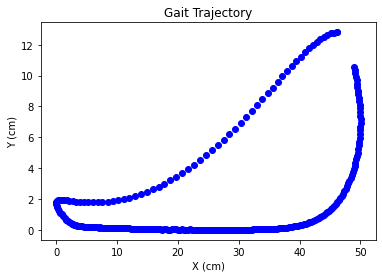

In [72]:
#Plotting the points
plt.scatter(x_array, y_array, color = "blue")
plt.xlabel("X (cm)")
plt.ylabel("Y (cm)")
plt.title("Gait Trajectory")
plt.show()

Question: 3c

In [76]:
#Considering the Gait motion to be equivalent to that of a @R elbow manipulator
def Gait_invkin(x, y, z, l1, l2):
  D = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
  theta2 = np.arccos(D)
  theta1 = np.arctan(y/x) - np.arctan((l2*np.sin(theta2))/(l1 + l2*np.cos(theta2)))

  print("Theta1 = ", theta1, ", Theta2 = ", theta2)
  Dh = np.matrix([[theta1, 0, l1, 0], 
      [theta2, 0, l2, 0]])
  H, J = DH2HnJ(Dh, [])

  print("End effector position = ", H[0:3, -1])
  print("Actual position = ", x, y, z)
  print(" ")

  return theta1, theta2

if __name__ == '__main__':
  total_values = np.size(x_array)
  thetas = np.zeros((total_values, 2))
  l1 = 40
  l2 = 44

  for i in range(total_values):
    thetas[i, 0], thetas[i, 1] = Gait_invkin(x_array[i], y_array[i], 0, l1, l2)


Theta1 =  -0.7641536807102911 , Theta2 =  1.9325926130413111
End effector position =  [[46.108625  ]
 [12.80912938]
 [ 0.        ]]
Actual position =  46.108625 12.809129375 0
 
Theta1 =  -0.7697127022616072 , Theta2 =  1.9461903425936233
End effector position =  [[45.6283125 ]
 [12.78621688]
 [ 0.        ]]
Actual position =  45.6283125 12.786216875 0
 
Theta1 =  -0.7764039129592637 , Theta2 =  1.9611378036021212
End effector position =  [[45.1054375 ]
 [12.73281687]
 [ 0.        ]]
Actual position =  45.1054375 12.732816875 0
 
Theta1 =  -0.7840088524051135 , Theta2 =  1.9766608418643756
End effector position =  [[44.5681875 ]
 [12.64651063]
 [ 0.        ]]
Actual position =  44.5681875 12.646510625 0
 
Theta1 =  -0.7926633585024179 , Theta2 =  1.9930495682267417
End effector position =  [[44.0059375 ]
 [12.52686063]
 [ 0.        ]]
Actual position =  44.0059375 12.526860625 0
 
Theta1 =  -0.8022625762085456 , Theta2 =  2.0101727730747663
End effector position =  [[43.422125  ]
 [12.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


End effector position =  [[nan]
 [nan]
 [nan]]
Actual position =  2.7125625 1.864915625 0
 
Theta1 =  nan , Theta2 =  nan
End effector position =  [[nan]
 [nan]
 [nan]]
Actual position =  2.177375 1.89348625 0
 
Theta1 =  nan , Theta2 =  nan
End effector position =  [[nan]
 [nan]
 [nan]]
Actual position =  1.70106250000001 1.918390625 0
 
Theta1 =  nan , Theta2 =  nan
End effector position =  [[nan]
 [nan]
 [nan]]
Actual position =  1.2691875 1.932580625 0
 
Theta1 =  nan , Theta2 =  nan
End effector position =  [[nan]
 [nan]
 [nan]]
Actual position =  0.904312499999992 1.941238125 0
 
Theta1 =  nan , Theta2 =  nan
End effector position =  [[nan]
 [nan]
 [nan]]
Actual position =  0.597812499999998 1.932310625 0
 
Theta1 =  nan , Theta2 =  nan
End effector position =  [[nan]
 [nan]
 [nan]]
Actual position =  0.355124999999998 1.911484375 0
 
Theta1 =  nan , Theta2 =  nan
End effector position =  [[nan]
 [nan]
 [nan]]
Actual position =  0.171437500000013 1.874018125 0
 
Theta1 =  nan , T

In [77]:
#From the above outputs of all the 261 values of the Gait cycle, we can see that the solution of the inverse kinematics is correct since the forward kinematics gives the same results

Question: 4b


In [78]:
import numpy as np
#Code credits:
# author Videh Patel :: videh.p@iitgn.ac.in :: 19110192

def DH2HnJ_2(Hmat, prismatic=[]):
    #Hmat is the DH parameter matrix
    #prismatic is an array of the joints that are prismatic: Joint corresponding to qi is ith joint
    #All revolute and prismatic axes are assumed to be aligned with the respective z axis

    def d_(k):
        #Returns position vector of ee wrt k-frame in o-frame basis
        return (T[k][:3,:3])@(np.linalg.inv(T[k])@T[n]@(np.matrix([[0],[0],[0],[1]])))[:3,0]
        
    n = len(Hmat)
    T = [np.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])]  #Array of all absolute Homogeneous Transformations : Has T0_0 at the start (Identity matrix)
    J = []  #Manipulator Jacobian
    for params in Hmat:
        theta, d, a, alpha = np.array(params)
        Ti = np.matrix([ [ np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)],\
                         [ np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],\
                         [ 0            , np.sin(alpha)               , np.cos(alpha)              , d              ],\
                         [ 0            , 0                           , 0                          ,1              ] ])
        

        T.append(T[-1]@Ti)

    for i in range(n):
        if (i+1) in prismatic:
            Jv = T[i][:3,:3]@np.matrix([0,0,1]).T
            Jw = np.matrix([0,0,0]).T
        else: #Revolute
            Jw = T[i][:3,:3]@np.matrix([0,0,1]).T
            Jv = np.matrix(np.cross(Jw.T,d_(i).T).T)
        
        Ji = np.concatenate((Jv, Jw))
        
        if len(J) == 0:
            J = Ji
        else:
            J = np.concatenate((J,Ji), axis = 1)

        H = T[n]

    return H, J


# DH Parameter Matrix [nx4 Matrix]
# Number of links automatically calculated from the size of matrix
# theta (rotation about z), d (translation about z), a(translation about x), alpha(rotation about x)
# First columns of params are frame 0-->1 and last columns are frame n-->(n+1) :: (n+1) is the end effector

def DHMatrix2Homo_and_Jacob(Hmat, EE_n, prismatic=[]):
    #Hmat is the DH parameter matrix
    #prismatic is an array of the joints that are prismatic: Joint corresponding to qi is ith joint
    #All revolute and prismatic axes are assumed to be aligned with the respective z axis

    def d_(k):
        #Returns position vector of ee wrt k-frame in o-frame basis
        return (T[k-1][:3,:3])@(np.linalg.inv(T[k-1])@T[n-1]@np.concatenate(((EE_n), np.matrix([[1]]))))[:3,0]
        
    n = len(Hmat)
    T = []  #Array of all absolute Homogeneous Transformations
    J = []  #Manipulator Jacobian
    for params in Hmat:
        theta, d, a, alpha = np.array(params)
        Ti = np.matrix([ [ np.cos(theta), -np.sin(theta)*np.cos(alpha), np.sin(theta)*np.sin(alpha), a*np.cos(theta)],\
                         [ np.sin(theta), np.cos(theta)*np.cos(alpha), -np.cos(theta)*np.sin(alpha), a*np.sin(theta)],\
                         [ 0            , np.sin(alpha)               , np.cos(alpha)              , d              ],\
                         [  0            , 0                           , 0                          ,1              ] ])
        
        if len(T) != 0:
            T.append(T[-1]@Ti)
        else:
            T.append(Ti)

    for i in range(1,n+1):
        if i in prismatic:
            Jv = T[i-1][:3,:3]@np.matrix([0,0,1]).T
            Jw = np.matrix([0,0,0]).T
        else: #Revolute
            Jw = T[i-1][:3,:3]@np.matrix([0,0,1]).T
            Jv = np.matrix(np.cross(Jw.T,d_(i).T).T)
        
        Ji = np.concatenate((Jv, Jw))
        
        if len(J) == 0:
            J = Ji
        else:
            J = np.concatenate((J,Ji), axis = 1)

        H = T[n-1]

    return H, J


In [79]:
DH = [[np.pi/3, 0, -10, 0]]
H, J = DH2HnJ_2(DH, [])
print(H)
print(J)

[[ 0.5        -0.8660254   0.         -5.        ]
 [ 0.8660254   0.5         0.         -8.66025404]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
[[ 8.66025404]
 [-5.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.        ]]
